In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('delivery_time.csv')

In [67]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [68]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [69]:
df.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Performing the EDA

In [73]:
# EDA is performed to check if the data is eligible to fit for the Simple Linear regression model or not

In [74]:
#renaming the columns as per our comfort
df.rename(columns={'Delivery Time':'DT', 'Sorting Time':'ST'}, inplace =True)

In [80]:
print(df['DT'].skew(), df['ST'].skew())

0.3523900822831107 0.047115474210530174


In [81]:
print(df['DT'].kurt(), df['ST'].kurt())

0.31795982942685397 -1.14845514534878


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

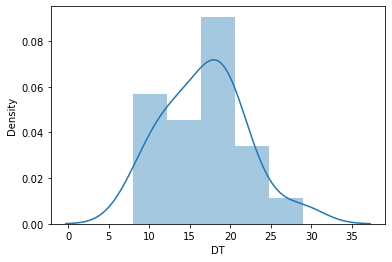

In [85]:
# As part of EDA, we are checking if there is any skewness in the data by visualizing with the distplots
sns.distplot(df.DT)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

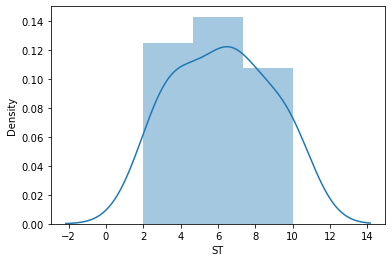

In [84]:
sns.distplot(df.ST)

In [86]:
# Finding the correlation
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [87]:
# As the corrlation coefficients are close to 1, they indicate of the linear relationship

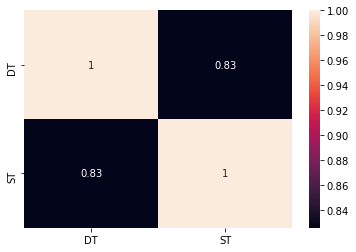

In [91]:
sns.heatmap(df.corr(),annot = True)
plt.show()
# annot is a command to get the values in the graph

In [92]:
# Here not much Skewness or Kurtosis is present and even the corrlation coefficients are close to 1 wich means linear relationship is good

# Fitting the regression model

In [94]:
import statsmodels.formula.api as smf

In [96]:
# defining the model
model = smf.ols('DT~ST', data=df).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

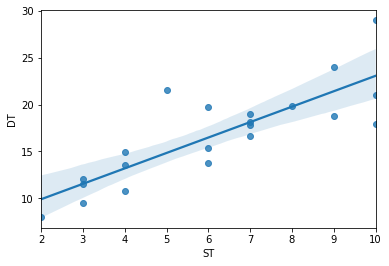

In [98]:
# plotting the model using seaborn
sns.regplot(y='DT', x='ST', data=df)

In [99]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [100]:
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [102]:
print(model.pvalues, '\n', model.tvalues)

Intercept    0.001147
ST           0.000004
dtype: float64 
 Intercept    3.823349
ST           6.387447
dtype: float64


In [103]:
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [104]:
# The value of the r square or r coefficient is small here so lets try with some other models

# Logarsthmic Transformation

In [105]:
# converting to log data

In [107]:
df['log_DT']= np.log(df['DT'])
df['log_ST']= np.log(df['ST'])

<AxesSubplot:xlabel='log_ST', ylabel='log_DT'>

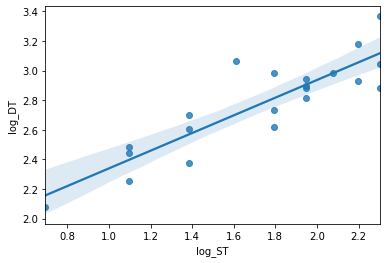

In [110]:
model_log = smf.ols('log_DT~log_ST', data=df).fit()
sns.regplot(x='log_ST', y='log_DT', data=df)

In [113]:
(model_log.rsquared, model_log.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [114]:
# The value of the rsquare is better for Logarathmic transformed data.
# Now let us test the r square for the Quadratic Transformed model

# Quadratic Transformation

In [116]:
df['sqrt_DT']= np.sqrt(df['DT'])
df['sqrt_ST']= np.sqrt(df['ST'])

<AxesSubplot:xlabel='sqrt_ST', ylabel='sqrt_DT'>

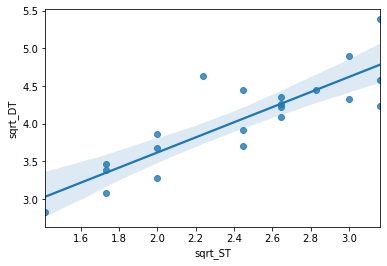

In [117]:
model_sqrt=smf.ols('sqrt_DT~sqrt_ST',data=df).fit()
sns.regplot(y='sqrt_DT', x='sqrt_ST', data=df)

In [118]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

In [119]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sqrt_DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.48e-07
Time:                        18:02:01   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_ST        1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# So we can decide that the Logarthmic tranformed model has given best fit as its r coefficient is high

In [121]:
#checking the p and t values for log model
(model_log.pvalues,'\n',model_log.tvalues)

(Intercept    5.921137e-11
 log_ST       1.601539e-07
 dtype: float64,
 '\n',
 Intercept    13.085552
 log_ST        8.024484
 dtype: float64)

In [122]:
# So p value is less and t value is high and we can use this model

# Predicting the Data with log model

In [132]:
# predicting for 20, 40, 60 data points
newdata=pd.Series([20,40,60])

In [133]:
newdata.head()

0    20
1    40
2    60
dtype: int64

In [145]:
df_new=pd.DataFrame(newdata, columns=['log_ST'])

In [146]:
model_log.predict(df_new)

0    13.692434
1    25.642880
2    37.593327
dtype: float64